<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/Time_Series/%5B%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8A%A4%ED%85%8C%EC%9D%B4%EC%85%98%5D%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### You Tube

* [시계열 데이터 분석 기초 Part 1](https://www.youtube.com/watch?v=0ErbtpR9HQA&t=1037s)
* [시계열 데이터 분석 기초 Part 2](https://www.youtube.com/watch?v=ZwjMJyA3r5s)
* [시계열 데이터 분석 기초 Part 3](https://www.youtube.com/watch?v=dvvQUfXRRHU)
* [시계열 데이터 분석 기초 Part 4](https://www.youtube.com/watch?v=LjE8qQ5i4gg)

### Setting

In [80]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib as plt
import matplotlib.font_manager as fm

In [82]:
fm._rebuild()
plt.rc('font', family='NanumGothic')

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load Data

In [84]:
path ='/content/drive/MyDrive/시계열_데이터.csv'
df1 = pd.read_csv(path)

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803675 entries, 0 to 803674
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     803675 non-null  object
 1   구매금액    803675 non-null  int64 
 2   물품대분류   803675 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [86]:
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [87]:
df1.tail()

,구매일,구매금액,물품대분류
803670,2020-08-06,30960,더블하트
803671,2020-08-06,6640,더블하트
803672,2020-08-06,5600,더블하트
803673,2020-08-06,7840,더블하트
803674,2020-08-06,8500,기타


In [88]:
df1['Datetime'] = pd.to_datetime(df1['구매일'])

In [89]:
df1['Datetime'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  803675
unique                    589
top       2019-10-11 00:00:00
freq                    10500
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

In [90]:
df1['year'] = df1['Datetime'].dt.year
df1['month'] = df1['Datetime'].dt.month
df1['week'] = df1['Datetime'].dt.week
df1['Day_of_week'] = df1['Datetime'].dt.day_name()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
df1.head()

,구매일,구매금액,물품대분류,Datetime,year,month,week,Day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday


### Visualization

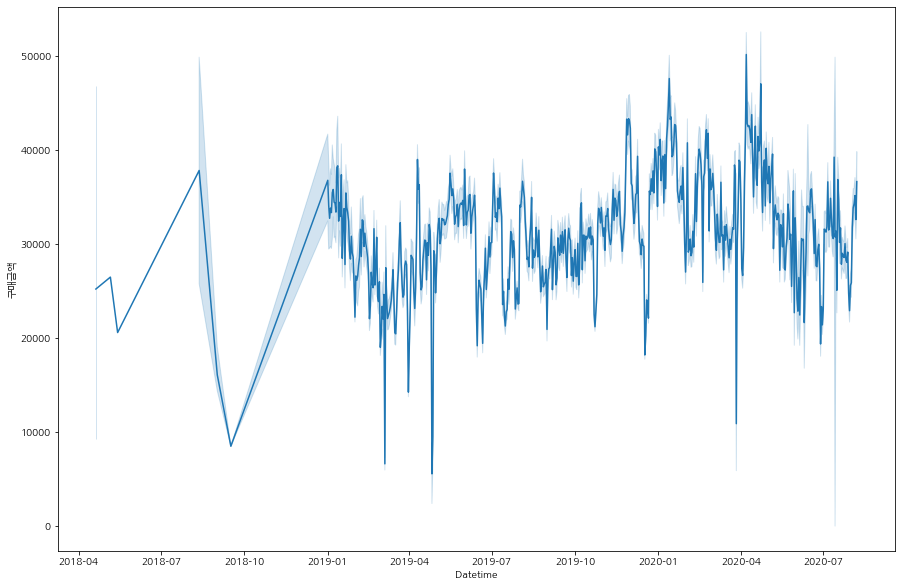

In [92]:
sns.lineplot(data=df1, x='Datetime', y='구매금액')

In [93]:
p1 = pd.pivot_table(
                    data=df1,
                    index='Datetime',
                    values='구매금액',
                    aggfunc='sum'
                    ).reset_index()

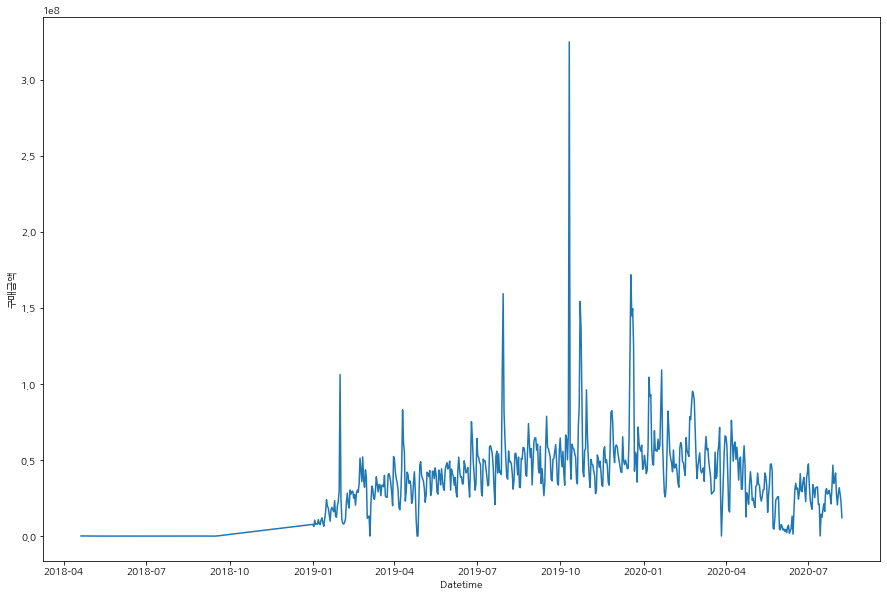

In [94]:
sns.lineplot(data=p1, x='Datetime', y='구매금액')

In [95]:
p2 = pd.pivot_table(
                    data=df1,
                    index=['Datetime', '물품대분류'],
                    values='구매금액',
                    aggfunc='sum'
                    ).reset_index()

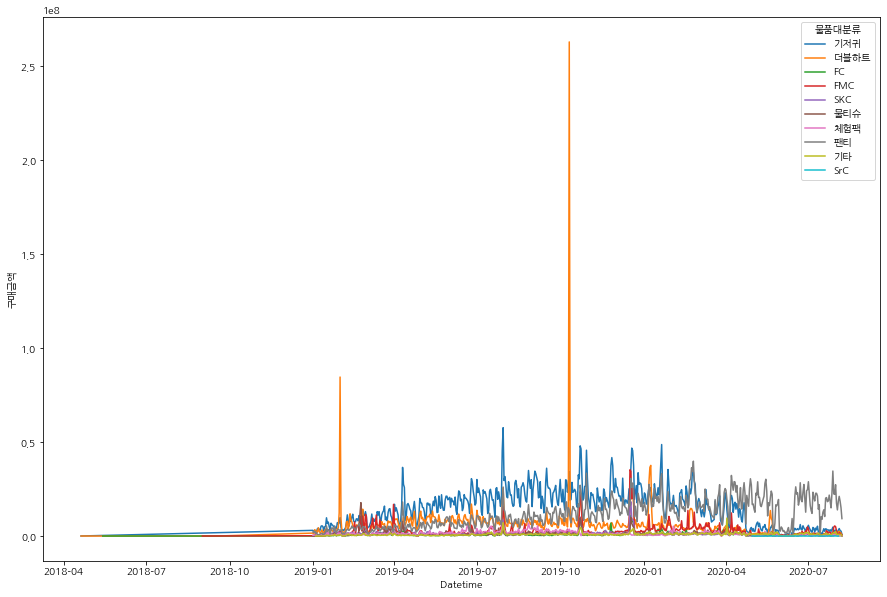

In [96]:
sns.lineplot(data=p2, x='Datetime', y='구매금액', hue='물품대분류')

In [97]:
cond1 = (df1['물품대분류']=='기저귀')
df2 = df1.loc[cond1].iloc[1:]
df2.head()

,구매일,구매금액,물품대분류,Datetime,year,month,week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


### ARIMA (Auto Regressive Integrated Moving Aberage Model)

* AR (Auto Regressive Model) : 자기회귀모델
  - p 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 자기회귀모델
  - ACF (자기상관함수) : 특정 구간 내 데이터 간 상관관계
  - PACF (부분자기상관함수)

* MA (Moving Average Model) : 이동평균모델
  - 일정한 구간의 데이터의 평균을 계산해, 미래를 예측하는 모델

* Difference : 차분

**ARIMA Model**

- 단기 예측에 적합
- 계절적 변동 요인 (주기적 변동)
- Sample > 50
- 정성적 자료 
  -> 차분


In [98]:
import statsmodels.tsa.api as tsa

In [99]:
df2.head()

,구매일,구매금액,물품대분류,Datetime,year,month,week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


In [100]:
df_time = pd.pivot_table(
                         data=df2,
                         index='Datetime',
                         values='구매금액',
                         aggfunc='sum')

In [101]:
df_time.head()

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680


In [102]:
y = df_time['구매금액'].resample('1D').mean()

In [103]:
y.isnull().sum()

7

In [104]:
y1 = y.fillna(method='ffill')

**시계열 분해**
  - Trend : 추세 요인
  - Seasonality : 계절 요인
  - Cycle / Resdiual : 불규칙 또는 순환 요인

In [105]:
from pylab import rcParams

rcParams['figure.figsize']=15,10

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


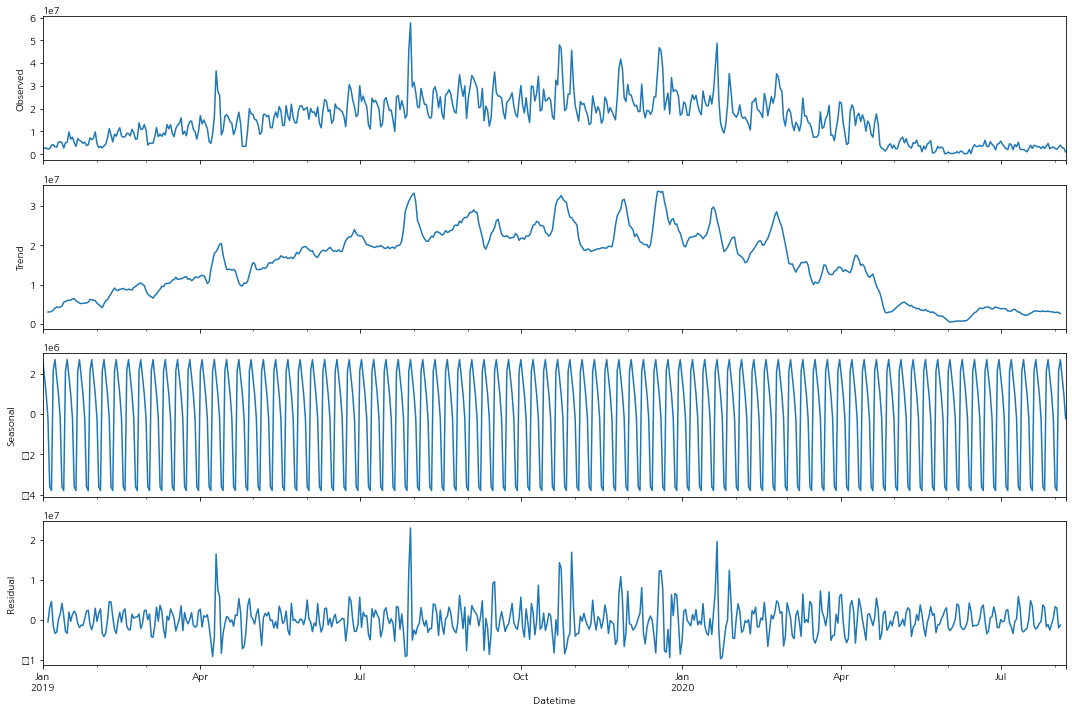

In [106]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y1, model='additive')

# 모델 시각화
fig = model_series.plot()

In [107]:
import itertools

In [108]:
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [109]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [110]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [111]:
for param in pdq:

  for param_seasonal in seasonal_pdq:

    try:

      mod = tsa.statespace.SARIMAX(y1,
                                   order=param,
                                   seasonal_order=param_seasonal,
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)
      
      results = mod.fit()
      param_list.append(param)
      param_seasonal_list.append(param_seasonal)
      results_AIC_list.append(results.aic)
    
    except:
      
      continue

In [112]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.sort_values(by='AIC').head(5)

,Parameter,Seasonal,AIC
43,"(1, 0, 1)","(0, 1, 1, 12)",18983.237154
47,"(1, 0, 1)","(1, 1, 1, 12)",18983.666910
23,"(0, 1, 0)","(1, 1, 1, 12)",19009.286110
63,"(1, 1, 1)","(1, 1, 1, 12)",19011.472166
59,"(1, 1, 1)","(0, 1, 1, 12)",19011.967430


In [113]:
mod = tsa.statespace.SARIMAX(y1,
                             order=(1, 0, 1),
                             seasonal_order=(1, 0, 1, 12),
                             enforce_stationarity=False,
                             enforce_invertibility=False)

results = mod.fit()

In [114]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               구매금액   No. Observations:                  585
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -9657.064
Date:                            Sat, 23 Jul 2022   AIC                          19324.128
Time:                                    08:31:29   BIC                          19345.865
Sample:                                01-01-2019   HQIC                         19332.608
                                     - 08-07-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5895      0.037     15.766      0.000       0.516       0.663
ma.L1          0.2724      0.045   

**Likelihood (최대우도)**
* 특정 데이터가 모수로부터 추출되었을 가능도
* 특정 값에 대한 분포의 확률 추정 (연속 확률 밀도 함수의 pdf의 y값)

**AIC (Akaike Information Criterion)**
* 데이터에 대한 모델의 상대적 품질 수준
* AIC = -2 IN(L) + 2k
* 값이 낮을수록 모형 적합도가 높은 것을 의미

**BIC (Bayes Information Criterion)**
* 데이터에 대한 모델의 상대적 품질 수준
* BIC = -2 In(L) + log(n)p
* 변수가 더 많은 경우, AIC에 더 많은 패널티를 부여해 계산

**HQIC (Hannan Quinn Information Criterion)**
* HQIC = -2 In(L) + 2k In(In(n))

In [115]:
print(results.summary().tables[0])

                                 Statespace Model Results                                 
Dep. Variable:                               구매금액   No. Observations:                  585
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -9657.064
Date:                            Sat, 23 Jul 2022   AIC                          19324.128
Time:                                    08:31:29   BIC                          19345.865
Sample:                                01-01-2019   HQIC                         19332.608
                                     - 08-07-2020                                         
Covariance Type:                              opg                                         


**Order (p, d, q)** 
* p : AR에서의 p 값 (p 구간 내 데이터 사이의 상관관계)
* d : 차분
* q : MA에서의 PACF 편상관계수 q 값

**Seasonal Order (P, D, Q, M)**
* P : 계절성 주기에서의 p 구간 내 데이터 사이의 상관관계
* D : 계절성 여부 (1 or 0)
* Q : ACF 함수를 기준으로 계절성 주기 반복 횟수
* M : 계절성 주기가 어느 정도인지

In [116]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5895      0.037     15.766      0.000       0.516       0.663
ma.L1          0.2724      0.045      6.097      0.000       0.185       0.360
ar.S.L12       0.9777      0.011     86.928      0.000       0.956       1.000
ma.S.L12      -0.7738      0.038    -20.539      0.000      -0.848      -0.700
sigma2      2.882e+13   3.25e-16   8.86e+28      0.000    2.88e+13    2.88e+13


**Ljung-Box Text**
* 일정 기간동안 관측치가 랜덤이고, 독립적인지 여부를 검증
  * 귀무 : 데이터가 상관관계를 나타내지 않는다
  * 대립 : 데이터가 상관관계를 나타낸다
  * P.value (귀무가설이 참일 확률) < 0.05 (유의수준) -> 대립가설 참

**Jarque Bera Test**
* 왜도와 첨도가 정규분포와 일치하는지 가설검정 
    - SARIMAX : 잔차의 분포가 정규분포 인가 
    - 귀무 : 해당 잔차(residual)는 정규분포와 일치한다.
    - 대립 : 해당 잔차(residual)는 정규분포와 일치하지 않는다. 
    - P.value < 0.05 , 해당 잔차(residual)는 정규분포와 일치하지 않는다.

In [117]:
print(results.summary().tables[-1])

Ljung-Box (Q):                      433.65   Jarque-Bera (JB):               273.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.82
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.97
